### Напишите программу, позволяющую строить потенциал и напряженность электрического поля диполя, считая, что составляющие его электрические заряды одинаковы по величине и противоположны по знаку.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m

%matplotlib inline

In [2]:
def phi(q, xq, yq, X, Y):
    e0 = 8.85e-12
    M = np.zeros((len(X), len(Y)))
    
    for i in range(len(X)):
        for j in range(len(Y)):
            s = 0
            for k in range(len(q)):
                s += q[k]/((X[i] - xq[k])**2+(Y[j] - yq[k])**2)**0.5
                
            M[i, j] = s/(4*e0*m.pi)
            
    return M

In [3]:
e=1.6e-16
R_0 = 1e-6
q = [e, -e]

xq = np.array([-R_0, R_0])
yq = np.zeros(2)

N1 = 100
x_min = y_min = -3*R_0
x_max = y_max = 3*R_0

px = np.array([x_min+(x_max-x_min)/N1*i for i in range(N1)])
py = np.array([y_min+(y_max-y_min)/N1*i for i in range(N1)])

P = phi(q, xq, yq, px, py)
x1, y1 = np.meshgrid(px, py)

ex, ey = np.gradient(-P, 0.1, 0.1)
E = (ex**2 + ey**2)**0.5

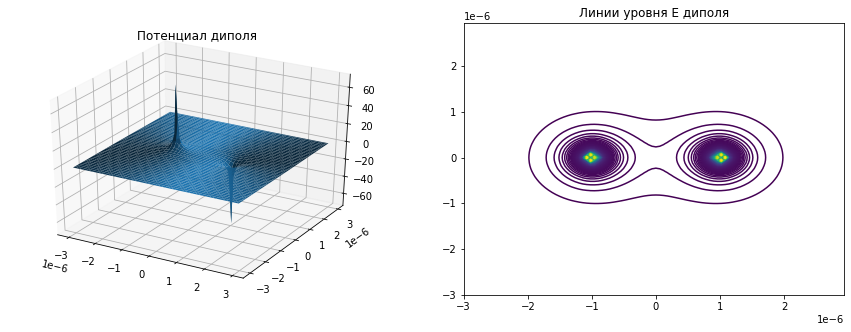

In [4]:
fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Потенциал диполя')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Линии уровня E диполя')

ax1.plot_surface(y1, x1, P, linewidth=0)
ax2.contour(y1, x1, E, 400)

plt.show()

### Напишите программу, позволяющую строить потенциал и напряженность электрического поля квадроуполя, то есть электрическую систему, состоящую из четырех равных по абсолютной величине электрических зарядов, расположенных в вершинах квадрата, считая, что электрические заряды, расположенные в соседних вершинах, имеют разный знак.

In [5]:
q = [e, -e, e, -e]

xq = np.array([-R_0, -R_0, R_0, R_0])
yq = np.array([-R_0, R_0, -R_0, R_0])

N1 = 100
x_min = y_min = -3*R_0
x_max = y_max = 3*R_0

px = np.array([x_min + (x_max - x_min) / N1 * i for i in range(N1)])
py = np.array([y_min + (y_max - y_min)/ N1 * i for i in range(N1)])

P = phi(q, xq, yq, px, py)
x1, y1 = np.meshgrid(px, py)

ex, ey = np.gradient(-P, 0.01, 0.01)
E = (ex**2 + ey**2)**0.5

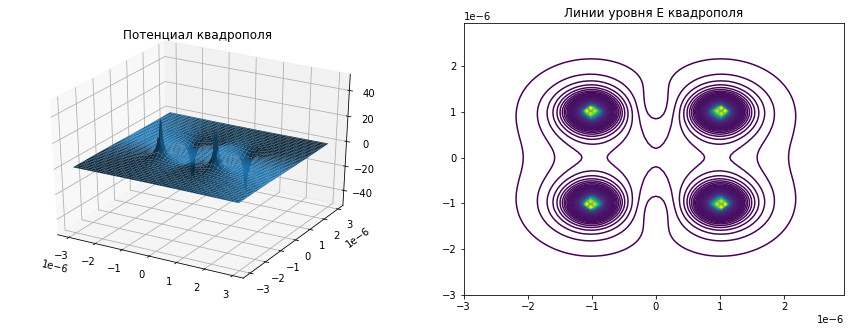

In [6]:
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Потенциал квадрополя')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Линии уровня E квадрополя')

ax1.plot_surface(y1, x1, P, linewidth=0)
ax2.contour(y1, x1, E, 400)

plt.show()

### Как известно зависимость напряженность поля, создаваемого магнитным диполем $\vec{M}$, описывается формулой:
$$\vec{B}(\vec{R}) = \frac{3(\vec M \cdot \vec R)}{|\vec R|^5} - \frac{\vec M}{|\vec R|^3}$$
- Исследуйте особенности магнитного поля, создаваемого магнитным диполем. Рассмотрите магнитные поля на различных расстояниях от диполя.
- Сравните магнитные поля, создаваемые кольцом с током и магнитным диполем. Какой вывод можно сделать?

In [7]:
def ring(a, y, z):
    Nstep = 100
    x = 0
    Ny = len(y)
    Nz = len(z)
    
    delta_phi = 2*m.pi / Nstep
    
    phi = [delta_phi * (n-1) for n in range(1, Nstep + 2)]
        
    By = np.zeros((Ny, Nz), dtype=np.float64)
    Bz = np.zeros((Ny, Nz), dtype=np.float64)
        
        
    for i in range(Ny):
        for j in range(Nz):
            s = np.array([0, 0, 0], dtype=np.float64)
            
            for n in range(Nstep+1):
                dL = np.array([-a*m.sin(phi[n]) * delta_phi, a*m.cos(phi[n])*delta_phi, 0])
                r = np.array([a*m.cos(phi[n]), a*m.sin(phi[n]), 0])
                R = np.array([x, y[i], z[j]])
                s = s + np.cross(dL, (R-r))/(np.dot((R-r), (R-r)[None].T.conj()))**(3/2)
            
            By[i][j] = s[1]
            Bz[i][j] = s[2]
            
    return (By, Bz)

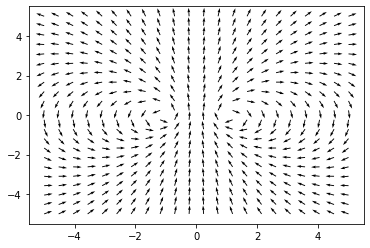

In [8]:
N1 = 21
y_min = -5
z_min = -5
y_max = 5
z_max = 5
y = []
z = []
for i in range(1, N1+2):
    y.append(y_min + (y_max - y_min)/N1 * (i-1))
    z.append(z_min + (z_max - z_min)/N1 * (i-1))
    
a = 1
By, Bz = ring(a, y, z)

mp = (By**2 + Bz**2)**0.5

by = By / mp
bz = Bz / mp

y1, z1 = np.meshgrid(y, z)

fig = plt.figure()
ax = fig.add_subplot(111)
quiv = ax.quiver(z1, y1, by, bz)

### Моделирование двиижения электрических зарядов в постоянном магнитном поле

In [9]:
H = [0, 0, 1]

def lorenz_force(t, z):
    f = np.zeros(6)
    f[0] = z[1]
    f[1] = 2*m.pi*(H[2]*z[3] - H[1]*z[5])
    f[2] = z[3]
    f[3] = -2*m.pi*(H[2]*z[1] - H[0]*z[5])
    f[4] = z[5]
    f[5] = 2*m.pi*(H[1]*z[1] - H[0]*z[3])
    
    return f

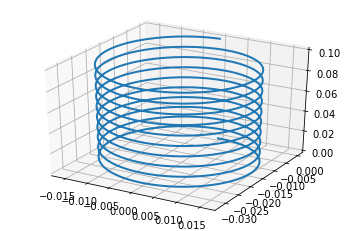

In [10]:
x0 = 0
y0 = 0
z0 = 0
vx0 = 0.1
vy0 = 0
vz0 = 0.01

t0, t1 = 0, 10                # start and end
t = np.linspace(t0, t1, 1000)  # the points of evaluation of solution
R0 = [x0, vx0, y0, vy0, z0, vz0]                   # initial value
#sol = integrate.odeint(lorenz_force, R0, t)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(lorenz_force).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#print(sol)
surf = ax.plot(R[:,0], R[:,2], R[:,4], linewidth=2)

### Задание:
1. Постройте проекции траектории движения на соответствующие координатные плоскости.
2. Проекция траектории движения на плоскость, перпендикулярную вектору напряженности магнитного поля, является окружностью. Определите ее радиус и период обращения по окружности. Объясните полученные результаты.
3. Исследуйте зависимость величины шага спирали от скорости движения заряда.
4. Постройте зависимости скорости и ее проекций на соответствующие координатные плоскости от времени.
5. Исследуйте зависимость точности и устойчивости численного решения системы ДУ (6.43) от шага интегрирования.

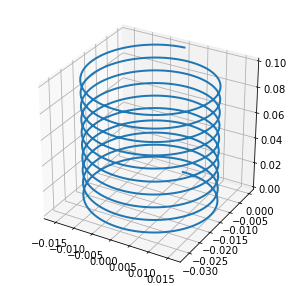

In [11]:
x0 = 0
y0 = 0
z0 = 0
vx0 = 0.1
vy0 = 0
vz0 = 0.01

t0, t1 = 0, 10                # start and end
t = np.linspace(t0, t1, 1000)  # the points of evaluation of solution
R0 = [x0, vx0, y0, vy0, z0, vz0]                   # initial value
#sol = integrate.odeint(lorenz_force, R0, t)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(lorenz_force).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
#print(sol)
surf = ax.plot(R[:,0], R[:,2], R[:,4], linewidth=2)

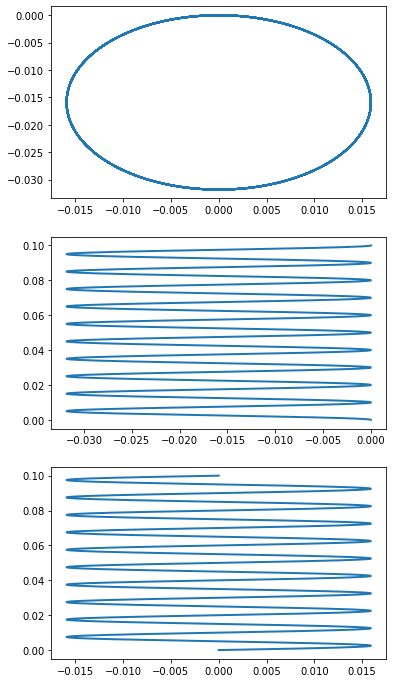

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 3 * 4))
surf = axes[0].plot(R[:,0], R[:,2], linewidth=2)

fig = plt.figure(figsize=(12, 8))
surf = axes[2].plot(R[:,0], R[:,4], linewidth=2)

fig = plt.figure(figsize=(12, 8))
surf = axes[1].plot(R[:,2], R[:,4], linewidth=2)